
**Dada una lista de ciudades y la distancia entre cada par de ellas, encontrar el camino más corto que visite cada ciudad exactamente una
vez y regrese a la ciudad de origen.**


**Consideraciones:**

> Etiquete a las ciudades como 0, 1, 2, ··· , N

> El viajero siempre parte de la ciudad n0.

> Tiene el mismo costo ir de la ciudad A a la ciudad B que ir de la ciudad B a la ciudad A.

> Una solucion al problema es una permutación de las N ciudades.

> La solucion inicial se genera utilizando un algoritmo voraz. Se parte
de la ciudad n0, se revisa el costo de ir a las N-1 ciudades restantes
y se elige la de menor costo. Posteriormente, se repite el proceso. Es
importante considerar que estamos generando permutaciones y por lo
tanto no puede haber ciudades repetidas en la solucion.

> El vecindario de una solución se genera de la siguiente forma:
>> Se elige al azar una posicion de la permutación. Se generan N-2 soluciones nuevas moviendo la ciudad de esa posición a cualquiera de las otras N-2 posiciones posibles.

> En la lista tabu se almacena la ciudad que se utilizo para generar el
vecindario y tendra un tiempo tabú de N/2 (piso)

**La salida del programa será:**
1. Recorrido que debe seguirá el viajero (permutación).
2. Costo de seguir el recorrido encontrado.

# Librerias

In [17]:
# Bibliotecas a utilizar
from random import shuffle
from random import randint
from math import floor
import numpy as np

# [Función] Generación de solución aleatoria
> La generación de esta solución es aleatoria, por lo que puedes obtener la mejor o la peor 

In [18]:
def generate_solution(N:int): 
  """A function to generate a possible solution
  N = int number of the cities
  return: array with a possible solution
  """
  #order_visit = ['0']
  #actual_city = X0[0]
  #from random import shuffle
  X0 = ["0"]
  #tmp = ["n{0}".format(i) for i in range(1,N-1)]; shuffle(tmp)
  tmp = ["{0}".format(i) for i in range(1,N-1)]
  shuffle(tmp)
  X0 = X0+tmp+X0
  return (X0)

# [Función] Generación de solución greedy única

> La generación de esta solución greedy fue hecha especificamente para el problema del manual de metaheuristicas, no es generica dada un input

In [19]:
def get_minimo(cities, city, my_way): 
  """
  cities = dict with the cities
  city = str with the current city
  my_way = array with the cities until now
  return: int str the distance and the city
  """
  min_value = 1000
  city_key = ''
  for key, value in cities[city].items():
    #print(f"ciudad: {city_key} valor:{min_value}")
    if (value < min_value) and (key not in my_way): 
      min_value = value
      city_key = key
    else: pass

  #print(city_key, min_value)
  #print(f"retornamos: valor: {min_value} - ciudad:{city_key}")
  return (min_value, city_key) 
  

In [20]:
#La solucion inicial se genera utilizando un algoritmo voraz. 
#Se parte de la ciudad n0, se revisa el costo de ir a las N-1 ciudades restantes
# y se elige la de menor costo. Posteriormente, se repite el proceso.
def generate_greedy_solution():
  #Dic = {0:{1:3, 2:4, 3:1...}, 1:{0:3..}..}
  """A function to generate a voraz solution
  N = int number of the cities
  all_cities = dict with city:distance from city to other cities
  """
  cities = {'0':{'1':49, '2':30, '3':53, '4':72, '5':19, '6':76, '7':87, '8':45, '9':48 },
            '1':{'0':49, '1': 0, '2':19, '3':38, '4':32, '5':31, '6':75, '7':69, '8':61, '9':25},
            '2':{'0':30, '1':19, '2':0, '3':41, '4':98, '5':56, '6':6, '7':6, '8':45, '9':53},
            '3':{'0':53, '1':38, '2':41, '3':0, '4':52, '5':29, '6':46, '7':90, '8':23, '9':98},
            '4':{'0':72, '1':32, '2':98, '3':52, '4':0, '5':63, '6':90, '7':69, '8':50, '9':82},
            '5':{'0':19, '1':31, '2':56, '3':29, '4':63, '5':0, '6':60, '7':88, '8':41, '9':95},            
            '6':{'0':76, '1':75, '2':6, '3':46, '4':90, '5':60, '6':0, '7':61, '8':92, '9':10},
            '7':{'0':87, '1':69, '2':6, '3':90, '4':69, '5':88, '6':61, '7':0, '8':82, '9':73}, 
            '8':{'0':45, '1':61, '2':45, '3':23, '4':50, '5':41, '6':92, '7':82, '8':0, '9':5},
            '9':{'0':48, '1':25, '2':53, '3':98, '4':82, '5':95, '6':10, '7':73, '8':5, '9':0}}

  my_way = ['0']
  whole_distance = 0
  current_city = my_way[0]    
  for _ in range(len(list(cities.keys()))-1):
    min_way, city_key = get_minimo(cities, current_city, my_way)
    #print(f"ciudad: {city_key}, distancia: {min_way}")
    my_way.append(city_key) # almacenamos la ciudad
    current_city = city_key # actualizamos la ciudad 
    whole_distance += min_way
    #min_way = min(list(cities[current_city].values())) # Obtenemos el valor de menor peso
    #for key,value in cities[current_city].items():
      #if min_way == value: # speramos que el valor coincida con el de menor peso obtenido previamente para obtener la ciudad
        #print( key, min_way)
        #my_way.append(city_key) # almacenamos la ciudad
        #current_city = city_key # actualizamos la ciudad 
        #whole_distance += min_way
        
  
  #Añadimos la distancia de la úúltima ciudad a la ciudad de origen
  back_distance = cities[my_way[-1]]['0']
  #print(back_distance, cities[my_way[-1]])
  whole_distance += back_distance
  my_way.append('0')
  return(my_way)

In [21]:
# test for greedy
#(generate_greedy_solution())
# it works!
# ['0', '5', '3', '8', '9', '6', '2', '7', '1', '4', '0'], 271


# [Función] Evaluación de distancia

In [22]:
def f(x, all_cities:dict):
  """my function to get the whole distance 
  x = array a permutation of the cities
  all_cities = dict with city:distance from city to other cities
  return: int with the whole distance
  """
  distance = 0
  actual_city = x[0] # ciudad actual
  #print(actual_city)
  for i in range(len(all_cities.keys())+1):
    #print(f"ciudad: {actual_city} distancia recorrida: {distance}")
    try:
      next_city = x[i+1] # ciudad siguiente
      #print("next",next_city)
    except:
      break

    if int(actual_city) < int(next_city):
      #print("ENTRE!")
      index_city_distance = abs(int(actual_city)-int(next_city))-1
      #print("index", index_city_distance)
      distance += all_cities[actual_city][index_city_distance] # Sumamos la distancia de ir de actual_city a next_city
      #print(all_cities[actual_city][index_city_distance],all_cities[actual_city], actual_city )
      actual_city = next_city
      #print("ciudad actual", actual_city)
      
    elif int(actual_city) > int(next_city):
      index_city_distance = abs(int(actual_city)-int(next_city))-1
      distance += all_cities[next_city][index_city_distance] # Sumamos la distancia de ir de actual_city a next_city
      actual_city = next_city
  
  return (distance)



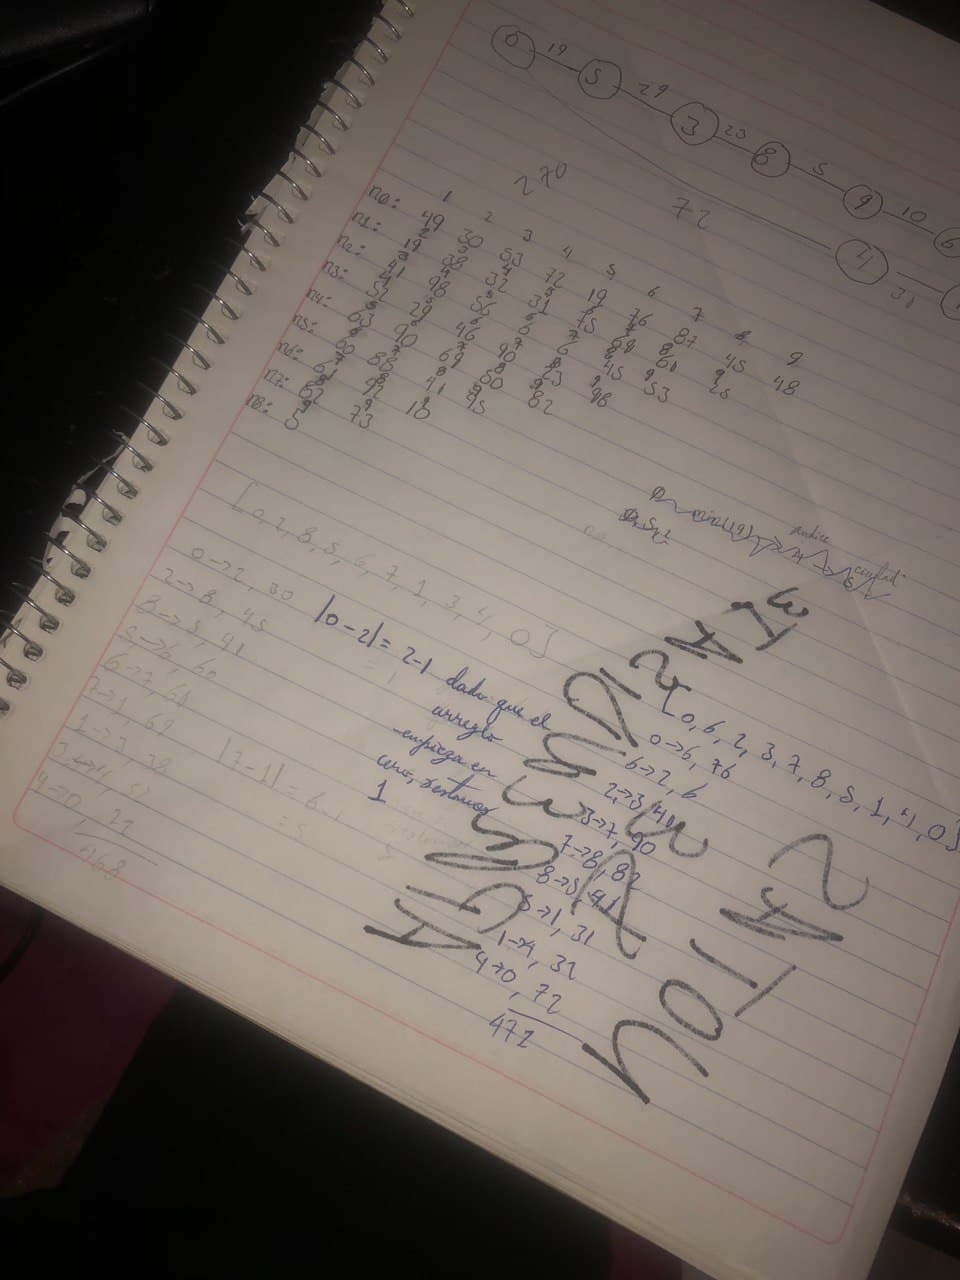

In [23]:
# test for f(x)
#x = ['0', '6', '2', '3', '7', '8', '5', '1', '4', '0']
#x = ['0', '5', '3', '8', '9', '6', '2', '7', '1', '4', '0']
#all_cities = {'0': [49, 30, 53, 72, 19, 76, 87, 45, 48], '1': [19, 38, 32, 31, 75, 69, 61, 25], '2': [41, 98, 56, 6, 6, 45, 53], '3': [52, 29, 46, 90, 23, 98], '4': [63, 90, 69, 50, 82], '5': [60, 88, 41, 95], '6': [61, 92, 10], '7': [82, 73], '8': [5]}

#print(f(x, all_cities))
# it works!

# [Función] Actualizar Lista Tabú 

In [24]:
def update_tabu_list(tabu_list:dict): 
  """function to update tabu list
  tabu_list = dict with city: tabu time
  return: dict with update tabu list
  """
  for i in range(len(tabu_list)): 
    try:
      #print(i[1])
      tabu_list[i][1] -= 1
      if tabu_list[i][1] == 0:
        #print("ENTRE! {0}".format(tabu_list[i]))
        tabu_list.pop(i)
        #print("new tabu: {0}".format(tabu_list))
    except:
      pass
  return (tabu_list)

# [Función] Revisar lista tabú

In [25]:
def check_tabu_list(city_used:str, tabu_list):
  """function to know if an element is in tabu_list
  city_used = str city to check if is in tabu_list
  tabu_list = dict with city: tabu time
  return: True or False
  """
  status = False
  for element in tabu_list:
    if (city_used in element) == True:
      status = True


  return (status)

# [Función] Generación de vecindario

In [26]:
#El vecindario de una solución se genera de la siguiente forma: Se elige
#al azar una posición de la permutación. Se generan N-2 soluciones
#nuevas moviendo la ciudad de esa posición a cualquiera de las otras
#N-2 posiciones posibles.
def get_neighborhood(current_solution):
  """function to get more possibles solutions and maybe better
  current_solution = array with the current order of the cities
  return: array of arrays with N-2 pissibles solutions & the city used
  """
  #from random import randint
  tmp_solution = current_solution.copy() # Para no modificar nuestra solución actual
  neighborhood = [] # arreglo que contendra las N-2 soluciones
  index_city = randint(1, 8) # 0 corresponde a la ciudad de origen, esa no cambia y 9 igual
  city = current_solution[index_city] # ciudad que se usará para generar el vecindario
  #print(index_city)
  for i in range(1, len(current_solution)-1): #Ignoramos los extremos ya que corresponden a la ciudad de origen
    tmp = tmp_solution
    # hacemos el intercambio de posiciones
    val_tmp = tmp[i]
    tmp[i] = current_solution[index_city]
    tmp[index_city] = val_tmp
    # volvemos a la solución con la que entramos a esta función
    tmp_solution = current_solution.copy()
    # Evitamos almacenar el camino que le pasamos como input
    if tmp == current_solution:
      pass
    else:
      #almacenamos la solución generada a partir del intercambio de posiciones
      neighborhood.append(tmp)

  #print(neighborhood)

  return (neighborhood, city)

In [27]:
# test for getNeighborhood
#x = ['0', '1', '4', '7', '2', '6', '9', '8', '3', '5', '0']
#vecindario, city_used = get_neighborhood(x)
#for i in vecindario:
  #print(i)
#print(len(vecindario), city_used)
# It works!

# [Función] Generar matriz de adyacencia


In [28]:
def generate_adjacency_matrix (distances):
  """a function to generate an adjacency matrix
  distances = array with sub-arrays with the distances 
  """
  matrix = np.diag([10000] * int(len(distances)+1))
  for i in range(len(distances)):
    matrix[i,i+1:] = distances[i]

  return(np.where(matrix,matrix,matrix.T))
#dis_mat = np.where(matrix,matrix,matrix.T)

In [29]:
# test for generate_adjacency_matrix
#JUan = [[49, 30, 53, 72, 19, 76, 87, 45, 48],
#[19, 38, 32, 31, 75, 69, 61, 25],
#[41, 98, 56, 6, 6, 45, 53],
#[52, 29, 46, 90, 23, 98],
#[63, 90, 69, 50, 82],
#[60, 88, 41, 95],
#[61, 92, 10],
#[82, 73],
#[5]]
#adj = (generate_adjacency_matrix(JUan))
# it works!
#adj

# [Función] Obtener el camino de menor coste

In [30]:
def get_minimo_adj(adj_matrix, my_way): 
  """function to to get the minimun distance between A and B
  adj_matrix = array with the distances of the cities like [10000 49 30 53 72 19 76 87 45 48]
  my_way = array with the cities until now
  return: int str the distance and the city
  """
  min_value = 10000
  city_key = ''
  tmp = list(adj_matrix) # convertimos a lista para poder usar .index
  #print("Empieza")
  #print(f"my_Way: {my_way}")#" y adj_matrix: {adj_matrix}")
  key = 0 # Correspondera al indice y a su vez a la ciudad
  for value in adj_matrix:
    #value = i
    # la siguiente linea la comente ya que cuando existian dos núúmeros iguales en el arreglo
    # a la hora de obtener el indicie, si queria el segundo me daba el del primero
    # por eso cambie a la declaracióón de key = 0
    #key = tmp.index(value) # Obtenemos el indice del valor actual que corresponderáá a la ciudad
    #print("value", value)
    #(f"value: {value}, min_value: {min_value}, ciudad: {key}")
    #key = arr_index_adj(adj_matrix, value)
    #if (adj_matrix[key] == value) == True:
    # <= Para generar el minimo local desde el inicio 
    if (value < min_value) and (str(key) not in my_way): # corroboramos que tenemos la ciudad de menor peso y que a sido visitada 
      #print(f"ciudad: {key} valor: {value}")
      min_value = value
      city_key = key
    key += 1
        
    
  #print(city_key, adj_matrix[city_key])
  #print("TOME: ", city_key, "Valor", adj_matrix[city_key])
  #return (min_value, city_key)
  return (adj_matrix[city_key], city_key)

# [Función] Generación de solución greedy generica

In [31]:
def generate_greedy_solution_adj_matrix(adj_mat):
  """function to generate a greedy first solution 
  adj_mat = array with the adjacency matrix
  return: array with the best way
  """
  #adj_mat = list(adj_mat)
  my_way = ['0'] 
  current_city = my_way[0]
  #distance = 0
  tmp_adj_mat = adj_mat.copy()
  adj_matrix = tmp_adj_mat[int(current_city)]
  for _ in range(len(adj_mat)-1):
    #print(adj_mat[i], my_way)
    #print(adj_matrix, my_way,"\n")
    value, city = get_minimo_adj(adj_matrix, my_way)
    current_city = city
    
    adj_matrix = tmp_adj_mat[int(current_city)]
    #distance += value 
    my_way.append(str(current_city))
  
  #value += adj_mat[int(current_city)][0]
  my_way.append('0')
  #print(value)
  return(my_way)
    

In [32]:
#way = generate_greedy_solution_adj_matrix(adjacency_matrix)
#print(way, f(way, my_cities))

# [Función] INPUT DESDE ARCHIVO DE TEXTO

> Input automatico y generación de matriz de adyacencia

In [33]:
# INPUT Automatico
def get_dictarr_cities_by_textfile(name_file):
  """function to read the input from file txt
  name_file = str with the name file.txt
  return: dict with city:distance from city to other cities and array with adjacency matrix, int num cities, int num iterations 
  """
  with open('input.txt', 'r') as fichero:
    N = int(fichero.readline().split('\n')[0])
    Imax = int(fichero.readline().split('\n')[0])
    distances = []
    for linea in fichero:
        distances.append(linea.split(' '))
        
  
  for i in range(len(distances)):
    distances[i][-1] = distances[i][-1][:-1]
     #print(distances[i])
      #distances[8][-1]#[:-1]
  for element in range(len(distances)):
    distances[element]=(list(map(int,distances[element])))

  my_cities = {}
  key = 0
  for value in distances: 
    my_cities[str(key)] = value
    key += 1

  adj_distances = generate_adjacency_matrix(distances)
  #print(f"diccionario de ciudades: {my_cities}\narreglo de arreglos: {distances}")
  return (my_cities, adj_distances, N, Imax)

# [Función] INPUT A MANO

In [34]:
#all_cities = []
# INPUT A MANO
def get_dictarr_cities_by_hand():
  """function to read the input by hand
  return: dict with city:distance from city to other cities and array with adjacency matrix, int num cities, int num iterations 
  """
  Imax = 100
  N = int(input("num. ciudades: "))
  all_cities = {"{0}".format(i): "" for i in range(N-1)}
  for i in range(N-1):
    cities = input(f"ciudad {i}: ") # Recibimos la línea de ciudades
    cities = cities.split(" ") # detectamos cada número 
    my_cities = list(map(int, cities)) # convertimos cada número a entero
    key = f"{i}"
    all_cities[key] = my_cities # almacenamos la lista en el arreglo que contendra todas

  #print(all_cities)
  distances = []
  for i in all_cities.values():
    #print(i)
    distances.append(i)

  
  adj_distance = generate_adjacency_matrix(distances)
  return (all_cities, adj_distance, N, Imax)

In [35]:
#print(get_dictarr_cities_by_hand())

# [Función] Búsqueda Tabú

In [42]:
def tabu_search(Imax, N, all_cities, adj_matx):
  """Implementation of Tabu Search
  Imax = int number of iterations
  N = int number of cities
  all_cities = dict with city:distance from city to other cities
  adj_matx = array with the adjacency matrix
  return: (array with the best way, int with the whole distance)
  """
  #from math import floor
  # Generar solución inicial X0.
  # El viajero siempre parte de n0
  # De acuerdo a las consideraciones: La solucion inicial se genera utilizando un algoritmo voraz.
  #X0 = generate_solution(N) # aleatoria  #X0 = generate_greedy_solution() # no generica
  X0 = generate_greedy_solution_adj_matrix(adj_matx) # generica
  
  #print(f"Solución inicial: {X0}, {f(X0, all_cities)}")
  
  # Colocar el contador de iteraciones en 0: K <- 0
  k = 0
  X = X0
  # Inicializar la lista tabú como un conjunto vacio: T(X, K) = {}
  tabu_time = floor(N/2)
  tabu_list = [] # ["0",2] = [city, tabu_time]
  
  # Para no estancar el algoritmo en 248
  #possible_solutions, city_used = get_neighborhood(X)
  #X = possible_solutions[0] 
  #tabu_list.append([city_used, tabu_time])

  while k <= Imax:
    k += 1
    # Determinar el vecindario N(x)
    #possible_solutions, city_used = get_neighborhood(tmp_x)
    possible_solutions, city_used = get_neighborhood(X) 
    # Revisamos que la ciudad no este en la lista tabu
    status = check_tabu_list(city_used, tabu_list)
    if status == False: 
      tabu_list.append([city_used, tabu_time]) # Añadimos a la lista tabu, la ciudad usada para generar el vecindario
    elif status == True: 
      possible_solutions = [] # Para evitarel for que revisa las soluciones
    
    ## Determinar el conjunto de aspirantes A(X,K)
    ## Determinar el vecindario reducido: N*(X) = {N(X) - T(X, K)} u A(X, K) 
    # Escoger la mejor solución X entre las soluciones que estan en N*(X,K)
    for ps in possible_solutions:
      if f(ps, all_cities) < f(X, all_cities): #if f(x) < f(x*) 
          X = ps#X_start = X
          #tmp_x = X
    
    #actualizar la lista tabú L(X,K)
    tabu_list = update_tabu_list(tabu_list)

  return (X, f(X, all_cities))

# **MAIN**

In [44]:
if __name__ == "__main__":
  #Imax = 100
  print("Elige el número correspondiente a tu caso")
  type_input = int(input("1. Input a mano\n2. Input desde archivo de texto\n"))
  if type_input == 1:
    # dict city:[distances], adjacency matrix, num cities, num iterations 
    my_cities, adj_mat, N, Imax = get_dictarr_cities_by_hand()
    #print(my_cities,'\n', adj_mat, '\n', N, '\n', Imax)
    #print(f"->Búsqueda tabú: {tabu_search(Imax, N, my_cities, adj_mat)}")
    
  elif type_input == 2:
    file_name = str(input("Nombre del archivo: "))
    M = int(input("Número de ejecuciones: "))
    # dict city:[distances], adjacency matrix, num cities, num iterations 
    my_cities, adj_mat, N, Imax = get_dictarr_cities_by_textfile(file_name)
    #print(my_cities,'\n', adj_mat, '\n', N, '\n', Imax)
    #print(f"->Búsqueda tabú: {tabu_search(Imax, N, my_cities, adj_mat)}")
    # ------------------------------------------PARTE 2
    #1. Mejor soluci ́on encontrada considerando las M ejecuciones.
    #2. Peor soluci ́on encontrada considerando las M ejecuciones.
    #3. Soluci ́on que corresponde a la mediana considerando las M ejecuciones.
    #4. Media del valor de la funci ́on objetivo considerando las M ejecuciones.
    #5. Desviaci ́on est ́andar del valor de la funci ́on objetivo considerando las M ejecuciones.
    solutions = []
    #better_way = ""; better_weight = 100000
    #poor_way = ""; poor_weight = 0
    media = 0
    stdesv = []
    tmp = 0
    while tmp != M:
      way, weight = tabu_search(Imax, N, my_cities, adj_mat)
      element = (way, weight)
      media += weight
      stdesv.append(weight)
      #if element[1] < better_weight:
        #better_weight = element[1]
        #better_way = element[0]
      #if element[1] > poor_weight:
        #poor_weight = element[1]
        #poor_way = element[0]


      solutions.append(element)
      tmp += 1
    
    print(f"Mejor solución: {min(solutions)} ")#{better_way}, {better_weight}")
    print(f"Peor solución: {max(solutions)}")#{poor_way}, {poor_weight}")
    # Se supone que cuando es un número impar, se hace un promedio de los dos 
    # del centro pero ¿cóómo haces eso con listas? .-. 
    # Es por ello que lo he puesto así
    print(f"Mediana ejecuciones: {solutions[int(len(solutions)/2)]}")
    #print(f"Media: {media/len(solutions)}")
    print(f"Media: {media/M}")
    print(f"Desviación estandar: {np.std(stdesv)}")
  
  else:
    print("Opción no valida")
  #print(f"->Búsqueda tabú: {tabu_search(Imax, N, my_cities, adj_mat)}")

Elige el número correspondiente a tu caso
1. Input a mano
2. Input desde archivo de texto
2
Nombre del archivo: input.txt
Número de ejecuciones: 10000
Mejor solución: (['0', '5', '3', '8', '9', '6', '2', '7', '4', '1', '0'], 248) 
Peor solución: (['0', '5', '3', '8', '9', '6', '2', '7', '4', '1', '0'], 248)
Mediana ejecuciones: (['0', '5', '3', '8', '9', '6', '2', '7', '4', '1', '0'], 248)
Media: 248.0
Desviación estandar: 0.0


> **Comentario del autor:** Estuve debugeando por un buen rato en busca de fallos ya que hice corridas de M=1, 10, 100, 1000 y 10000 y para este problema en particular, *la mejor solución* y *la peor solución* dan 248 y creo que es debido a que la solución inicial greedy genera un camino con peso de 271, que como podemos darnos cuenta, esta demasiado cerca de 248, por lo que puedo decir que el algoritmo se estanca en ese minimo local. 

> Pero, si añadimos estás lineas de código: 

```
possible_solutions, city_used = get_neighborhood(X)
X = possible_solutions[0] 
tabu_list.append([city_used, tabu_time])
```
en la función de TabuSearch, justo antes del while, a la hora de correr el algoritmo, nos da la oportunidad de hacer más exploración. Básicamente lo que hacen estas lineas es que obtienen el vecindario de la solución inicial greedy y en lugar de tomar el camino de menor peso, toma el primer camino del vecindario. 
Da igual el peso, toma el primero y eso, cuando corremos el algoritmo nos permite hacer más exploración.


**Importante:** Se corre el riesgo de que al final, no encuentre el minimo local, que para este caso es 248.

Prueba de mi argumento anterior, lo encontramos en esta corrida que hice: 


```
Número de ejecuciones: 10000
Mejor solución: (['0', '1', '2', '7', '4', '8', '9', '6', '3', '5', '0'], 302) 
Peor solución: (['0', '9', '8', '4', '3', '6', '2', '7', '1', '5', '0'], 332)
Mediana ejecuciones: (['0', '5', '3', '8', '9', '6', '2', '7', '4', '1', '0'], 248)
Media: 261.0505
Desviación estandar: 23.826870330574263
```

Por lo tanto, dejare comentadas esas lineas por defecto, si el evaluador las quiere usar, únicamente tendrá que descomentarlas.


